<a href="https://colab.research.google.com/github/yogvidwankhede/OIBSIP/blob/main/Sales%20Prediction/sales_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SALES PREDICTION USING PYTHON

Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product. Typically, a product and service-based business always need their dataset Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("/content/Advertising.csv")
dataset.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [3]:
dataset = dataset.drop(axis = 1, columns = ["Unnamed: 0"])
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# EDA

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

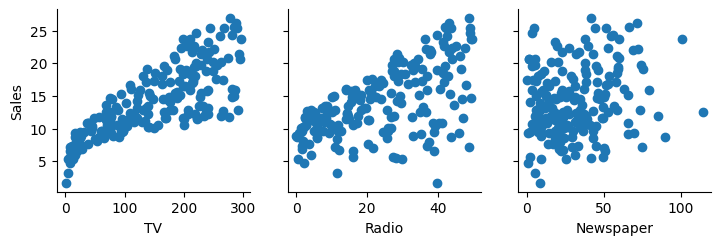

In [7]:
a = sns.PairGrid(x_vars=dataset[['TV','Radio','Newspaper']],y_vars=dataset[['Sales']],data=dataset)
a.map(plt.scatter)

During EDA process we found out that we don't have any null values in our datasetset.
Also we gained knowledge about our dependent as well as independent variable for model training


# Model Building

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( dataset.drop(columns = ["Sales"], axis = 1), dataset["Sales"], random_state= 41)
print(x_train)

        TV  Radio  Newspaper
176  248.4   30.2       20.3
6     57.5   32.8       23.5
158   11.7   36.9       45.2
197  177.0    9.3        6.4
143  104.6    5.7       34.4
..     ...    ...        ...
65    69.0    9.3        0.9
80    76.4   26.7       22.3
140   73.4   17.0       12.9
163  163.5   36.8        7.4
192   17.2    4.1       31.6

[150 rows x 3 columns]


In [9]:
b = [x_train, x_test, y_train, y_test]
for i in b:
    print(i.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [11]:
#Linear Regression
LinearReg = LinearRegression()
model = LinearReg.fit(x_train, y_train)

In [12]:
#Prediction
y_pred = LinearReg.predict(x_test)
y_pred

array([12.5182296 , 13.17033387, 17.08730532,  8.01198391, 18.97346064,
       12.40716642, 16.31839902,  4.26577303,  9.21655113,  7.48083931,
       21.60678924, 15.46049425,  8.9822182 , 18.39023597, 14.0010025 ,
       10.39325061,  9.85913696, 16.50295582,  9.79288392, 20.79477653,
       12.48032939, 17.26840097,  7.9917957 ,  6.35818434,  7.23948932,
       13.23649967, 18.21029546,  3.35711861, 22.89865114, 19.22540693,
        8.93597632,  6.66687329,  6.2921392 , 20.3792352 , 22.35363873,
        8.69918884, 15.20542542, 21.62848768, 17.25489551,  6.91051694,
       21.29911877, 20.8533569 ,  5.9414879 , 14.3942217 , 18.53319773,
       16.4692417 ,  5.8791081 , 11.94028049, 10.97138825,  9.72985798])

In [13]:
y_pred.mean() # mean of prdicted values

13.276751889277106

In [14]:
y_test.mean() #  mean of actual values

13.618000000000002

Here we can se that the mean of prdicted values is approximately equal to mean of actual values this ensures the accuracy of model is justifiable.



In [15]:
acc = model.score(x_test, y_test)
print("Linear Regression model accuracy (in %):", acc*100)

Linear Regression model accuracy (in %): 89.62913252219633


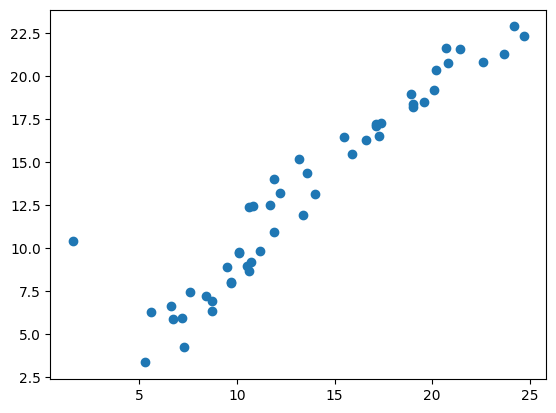

In [16]:
plt.scatter(y_test,y_pred)

## Prediction through user input

In [17]:
# User I/P 1
# TV / Radio / Newspaper
test_input1= np.array([36.7,27.5,6.8],dtype=object).reshape(1,3)

In [18]:
test_input1

array([[36.7, 27.5, 6.8]], dtype=object)

In [19]:
test_output1 = LinearReg.predict(test_input1)
test_output1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.72389373])

In [20]:
# User I/P 2
# TV / Radio / Newspaper
test_input2= np.array([105.6,56.8,11.4],dtype=object).reshape(1,3)

In [21]:
test_output2 = LinearReg.predict(test_input2)
test_output2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.5459231])